# ObsID : 0945060133, SRCNUM : 5, Instru : EPN
Not on Simbad.

## ESASky
EPIC Stack's pointer is not on the source location from XMM-Archive link. The closest pointer are far from the source. https://sky.esa.int/esasky/?target=53.59479166666666%20-28.90244444444444&hips=XMM-Newton+EPIC+color&fov=1&projection=SIN&cooframe=J2000&sci=true&lang=fr

``GAIA``

- Designation : Gaia DR3 5057101614813827200
- RA : 53.5942754°
- DEC : -28.9023933°
- Parallax : 2.941 mas
- G : 19.6951

``2MASS``

- Name : 03342264-2854082
- RA : 53.5943410°
- DEC : -28.9022880°

In [1]:
from xspec import *
from stingray import Lightcurve
from astropy.io import fits
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
import numpy as np

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

plt.rcParams['figure.figsize'] = [12,7]

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


## Fit statistic

In [2]:
Fit.statMethod = "chi"
Fit.nIterations = 100000
Fit.delta = 1e-4
Fit.criticalDelta = 1e-4

Default fit statistic is set to: Chi-Squared
   This will apply to all current and newly loaded spectra.
Parameter delta values for fits will now be 0.0001 * parValue


## Load files

In [3]:
AllData.clear()
spec = Spectrum(glob.glob("P*PNS*SRSPEC*.FTZ")[0])


1 spectrum  in use
 
Spectral Data File: P0945060133PNS003SRSPEC0005.FTZ  Spectrum 1
Net count rate (cts/s) for Spectrum:1  1.830e-02 +/- 1.435e-03 (86.6 % total)
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-10
  Telescope: XMM Instrument: EPN  Channel Type: PI
  Exposure Time: 1.046e+04 sec
 Using fit statistic: chi
 Using Background File                P0945060133PNS003BGSPEC0005.FTZ
  Background Exposure Time: 1.046e+04 sec
 Using Response (RMF) File            epn_e3_ff20_sdY7.rmf for Source 1
 Using Auxiliary Response (ARF) File  P0945060133PNS003SRCARF0005.FTZ



In [4]:
n_cts = 1.830e-02*1.046e+04

print("Number of counts =",n_cts)

if int(n_cts)<100:
    print()
    print("The low number of counts indicates that we should consider using cstat fit statistic instead of chi statistic.")

Number of counts = 191.418


## Plot spectrum

In [5]:
Plot.xAxis="keV"
Plot.device = "/xs"
Plot.xLog=True
Plot.yLog=True
#Plot.addCommand("Rescale Y 0.00001 0.005")
Plot("data")
spec.ignore("**-0.2 12-**")

      No channels ignored (no channels in specified range)
      No channels ignored (no channels in specified range)



(-0.5, 854.5, 660.5, -0.5)

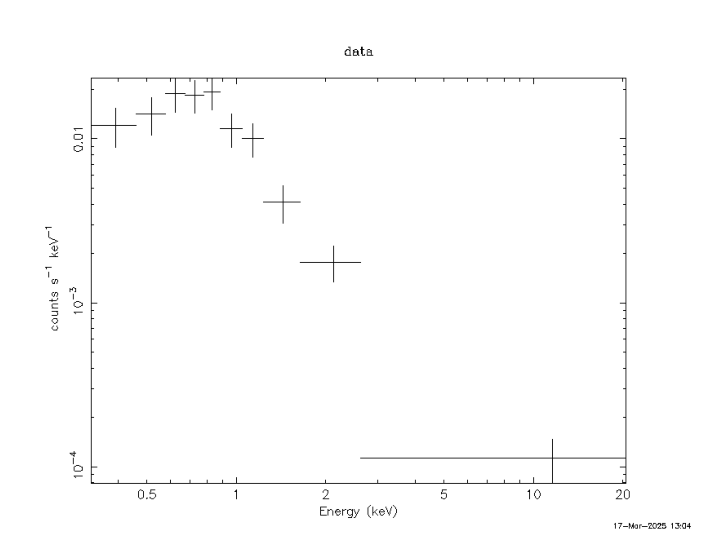

In [6]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum.png')[0])
plt.imshow(img)
plt.axis('off')

### Black body model

In [7]:
AllModels.clear()
mo = Model("tbabs*bbody")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
plt.show()
nH_bbody = mo.TBabs.nH.values[0]


Model TBabs<1>*bbody<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bbody      kT         keV      3.00000      +/-  0.0          
   3    2   bbody      norm                1.00000      +/-  0.0          
________________________________________________________________________

tbvabs Version 2.3
Cosmic absorption with grains and H2, modified from
Wilms, Allen, & McCray, 2000, ApJ 542, 914-924
Questions: Joern Wilms
joern.wilms@sternwarte.uni-erlangen.de
joern.wilms@fau.de

http://pulsar.sternwarte.uni-erlangen.de/wilms/research/tbabs/

PLEASE NOTICE:
To get the model described by the above paper
you will also have to set the abundances:
   abund wilm

Note that this routine ignores the current cross section setting
as it always HAS to use the Verner cross sections as a baseline.

Fit statistic  : Chi-Squared              4.325088e+12     using 10 bins.

Te

(-0.5, 855.5, 656.5, -0.5)

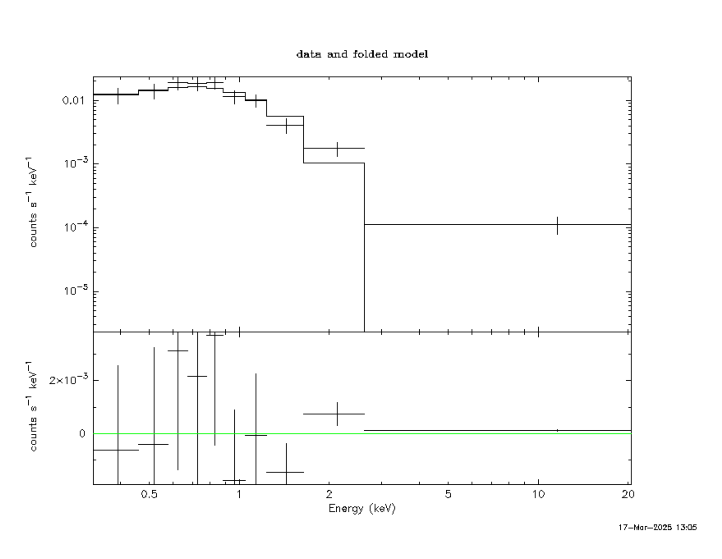

In [8]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum_bbody.png')[0])
plt.imshow(img)
plt.axis('off')

### Bremsstrahlung model

In [9]:
AllModels.clear()
mo = Model("tbabs*bremss")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_bremss = mo.TBabs.nH.values[0]


Model TBabs<1>*bremss<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bremss     kT         keV      7.00000      +/-  0.0          
   3    2   bremss     norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              1.006572e+11     using 10 bins.

Test statistic : Chi-Squared              1.006572e+11     using 10 bins.
 Null hypothesis probability of 0.000000e+00 with 7 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        3:norm
88.8825      3.79055      -1     0.0753325       8.81332   7.82319e-06
34.5637      1.27126e+06  -1     0.0146085       2.97524   1.37544e-05
13.9293      857178       -2    0.00680716       2.32258   2.13150e-05
1

(-0.5, 859.5, 659.5, -0.5)

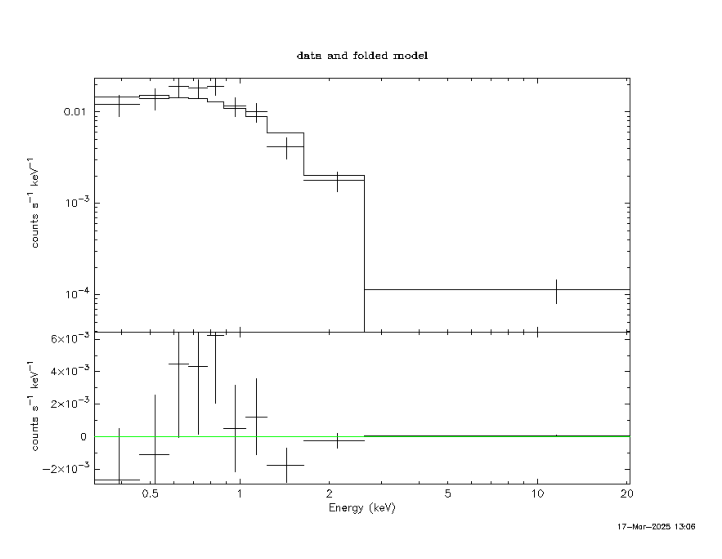

In [10]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum_bremss.png')[0])
plt.imshow(img)
plt.axis('off')

### Apec model

In [11]:
AllModels.clear()
mo = Model("tbabs*apec")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_apec = mo.TBabs.nH.values[0]


Model TBabs<1>*apec<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   apec       kT         keV      1.00000      +/-  0.0          
   3    2   apec       Abundanc            1.00000      frozen
   4    2   apec       Redshift            0.0          frozen
   5    2   apec       norm                1.00000      +/-  0.0          
________________________________________________________________________

Reading APEC data from 3.0.9


Fit statistic  : Chi-Squared              1.250090e+10     using 10 bins.

Test statistic : Chi-Squared              1.250090e+10     using 10 bins.
 Null hypothesis probability of 0.000000e+00 with 7 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        5:norm
83.9494      8.96432      -1      0.973936      0.548025   9

(-0.5, 860.5, 659.5, -0.5)

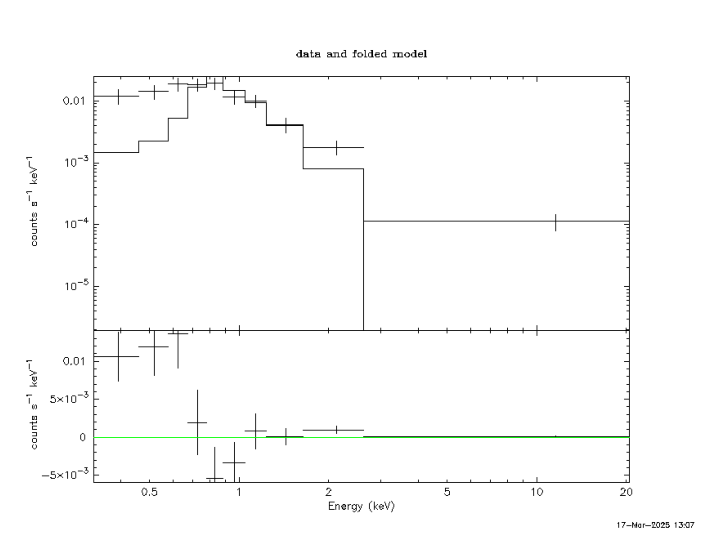

In [12]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum_apec.png')[0])
plt.imshow(img)
plt.axis('off')

### Powerlaw model

In [13]:
AllModels.clear()
mo = Model("tbabs*powerlaw")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_powerlaw = mo.TBabs.nH.values[0]


Model TBabs<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   powerlaw   PhoIndex            1.00000      +/-  0.0          
   3    2   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              7.868717e+11     using 10 bins.

Test statistic : Chi-Squared              7.868717e+11     using 10 bins.
 Null hypothesis probability of 0.000000e+00 with 7 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH    2:PhoIndex        3:norm
108.225      4.09635      -1     0.0962372       1.12716   3.80248e-06
51.9691      1.95455e+06  -2     0.0126874       1.66279   7.44572e-06
18.7651      1.68154e+06  -3      0.141564       2.69841   1.91652e-05

(-0.5, 855.5, 660.5, -0.5)

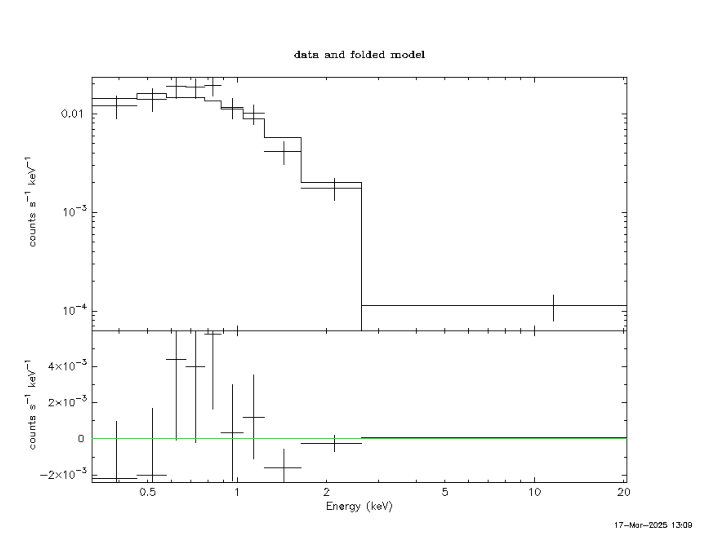

In [14]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum_powerlaw.png')[0])
plt.imshow(img)
plt.axis('off')

## Column density nH
### 3DNH-tool
http://astro.uni-tuebingen.de/nh3d/nhtool

**Sky coordinates (°) :** (GAIA)

- RA = 53.5942754°
- Dec = -28.9023933°

53.59 -28.90

**Column density :** nH = 3*10^20 cm^-2

In [15]:
print("The different models give a column density of :")
print()
print(color.BOLD+"bbody"+color.END)
print(f"(tbabs) : {nH_bbody*10**22}")
print()
print(color.BOLD+"bremss"+color.END)
print(f"(tbabs) : {nH_bremss*10**22}")
print()
print(color.BOLD+"apec"+color.END)
print(f"(tbabs) : {nH_apec*10**22}")
print()
print(color.BOLD+"powerlaw"+color.END)
print(f"(tbabs) : {nH_powerlaw*10**22}")

The different models give a column density of :

bbody
(tbabs) : 176283.10561339612

bremss
(tbabs) : 4.672655939485924e+20

apec
(tbabs) : 6.162879208021014e+21

powerlaw
(tbabs) : 1.3991180411493105e+21


## Flux
### X-ray flux

In [16]:
AllModels.calcFlux(".2 12.0")

 Model Flux 3.5959e-05 photons (6.7526e-14 ergs/cm^2/s) range (0.20000 - 12.000 keV)


In [17]:
Flux = 6.7526e-14 # ergs/cm^2/s
print(color.BOLD+"X-ray flux : "+color.END+f"F_X = {Flux} ergs/cm^2/s")

X-ray flux : F_X = 6.7526e-14 ergs/cm^2/s


### Optical flux

In [18]:
def F_optical(mag):
    F0 = 1.05*10**(-5) # GAIA zero point magnitude
    return F0*10**(-0.4*mag)
    
G = 19.6951

F = F_optical(G)

print(color.BOLD+"Optical  flux : "+color.END+f"F_opt = {F} ergs/cm^2/s")

Optical  flux : F_opt = 1.390430542671063e-13 ergs/cm^2/s


### X-ray flux / Optical flux ratio

In [19]:
print(color.BOLD+"X-ray flux / Optical flux ratio : "+color.END+f"F_x-ray/F_optical = {Flux/F}")
print(f"F_x-ray = {Flux/F}*F_optical")

X-ray flux / Optical flux ratio : F_x-ray/F_optical = 0.4856481350753438
F_x-ray = 0.4856481350753438*F_optical


### Luminosity

In [20]:
"""GAIA"""

P_mas = 2.941 # Parallaxe en mas
d_kpc = 1/P_mas # Distance en kpc
d_cm = d_kpc*3.0857*10**21 # Distance en cm, avec 1 pc = 3.0857*10^18 cm

# La source est supposée sphérique pour le calcul de la luminosité : L = 4*pi*F*D^2
Luminosity = 4*np.pi*Flux*(d_cm)**2 # erg/s

print(color.BOLD+"(GAIA)"+color.END)
print(f"Distance : {d_cm} cm")
print(f"Luminosité : {Luminosity} erg/s")

(GAIA)
Distance : 1.0492009520571234e+21 cm
Luminosité : 9.341104711651814e+29 erg/s
